In [22]:
import matplotlib.pyplot as plt
import numpy as np
import pyeit.mesh as mesh
from pyeit.mesh.shape import thorax
from pyeit.mesh.wrapper import PyEITAnomaly_Circle
from support import plot_mesh

In [6]:
n_el = 16  # nb of electrodes
mesh_obj = mesh.create(n_el, h0=0.05, fd=thorax)

In [28]:
perm_l = list()
splts = 50
for lung_r in np.linspace(0.1, 0.4, splts):
    lung_anomaly_r = PyEITAnomaly_Circle(center=[0.5, 0], r=lung_r, perm=10.0)
    lung_anomaly_l = PyEITAnomaly_Circle(center=[-0.45, 0], r=lung_r, perm=10.0)

    mesh_obj = mesh.set_perm(
        mesh_obj, anomaly=[lung_anomaly_l, lung_anomaly_r], background=1.0
    )
    perm_l.append(len(np.where(mesh_obj.perm_array == 10)[0]))
    # plot_mesh(mesh_obj)

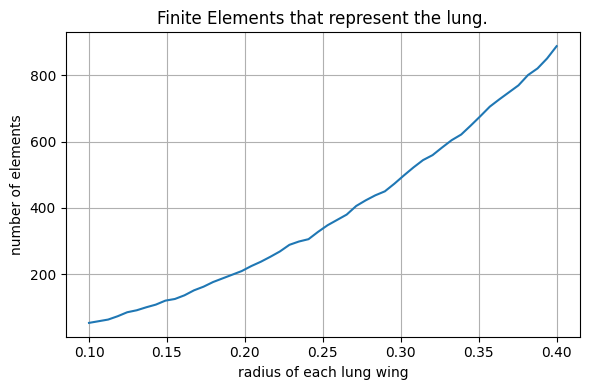

In [30]:
plt.figure(figsize=(6, 4))
plt.title("Finite Elements that represent the lung.")
plt.plot(np.linspace(0.1, 0.4, splts), perm_l)
plt.xlabel("radius of each lung wing")
plt.ylabel("number of elements")
plt.grid()
plt.tight_layout()
plt.show()